# Exploratory Data Analysis
---------------------------------

In this step, we are exploring our dataset. The resulting dataframe consists of the following columns:

- **Image Path:** Path and filename of each image
- **Emotion:** High-level emotion label (Positive, Negative, Surprised)

This list will store a 0 or 1 indicating the absence or presence of Facial Action Unit in each image.

- **AU1:** Indicating the inner eyebrows being raised.
- **AU2:** Indicating the outer eyebrows being raised.
- **AU4:** Indicating the eyebrows being lowered and drawn in.
- **AU6:** Indicating raising of the cheeks.
- **AU7:** Indicating tightening and closing of the eyelids.
- **AU12:** Indicating smiling by pulling the lip corners up.
- **AU15:** Indicating frowning by pulling the lip corners down.
- **AU17:** Indicating raising of the chin.
- **AU20:** Indicating stretching of the lips horizontally.
- **AU25:** Indicating parting of the lips.
- **AU26:** Indicating the dropping of the jaw.

In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [3]:
# Load the data labels CSV file
data = pd.read_csv('data_labels.csv')

In [18]:
data.head()

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


In [19]:
# Check the number of images and distribution of emotion classes
print(data.shape)
print(data['high_level_emotion'].value_counts())

(560, 21)
negative    328
positive    121
surprise    111
Name: high_level_emotion, dtype: int64


In [20]:
# Explore distribution of FACS action units
print(data.drop('high_level_emotion', axis=1).sum())

subject        S005S010S010S010S010S010S010S011S011S011S011S0...
sequence                                                    2020
image_index                                                10205
filepath       ./cohn-kanade-images/S005/001/S005_001_0000001...
file_prefix    S005_001_00000011S010_001_00000014S010_002_000...
AU17                                                         202
AU1                                                          177
AU2                                                          117
AU25                                                         292
AU27                                                          81
AU4                                                          194
AU7                                                          121
AU23                                                          60
AU24                                                          58
AU6                                                          123
AU12                     

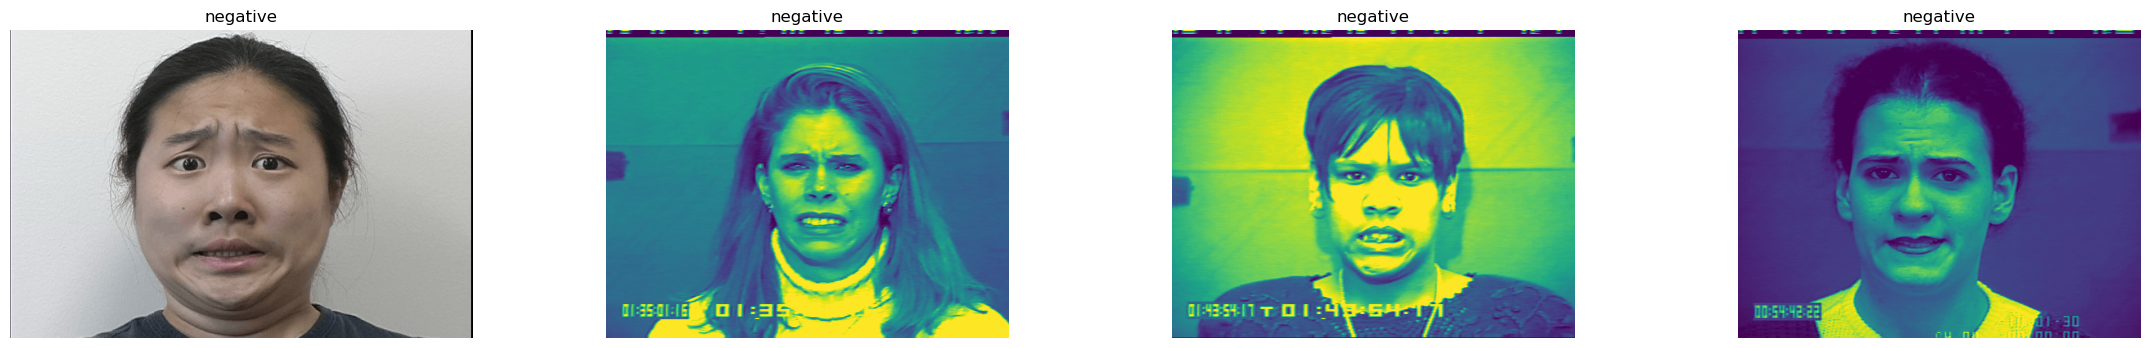

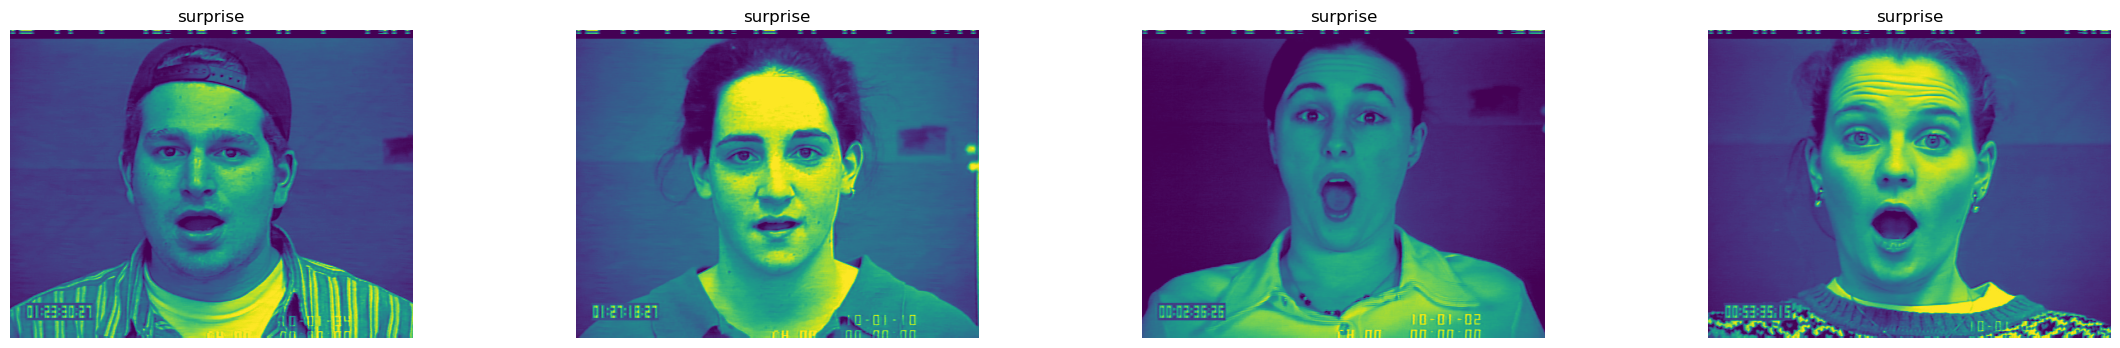

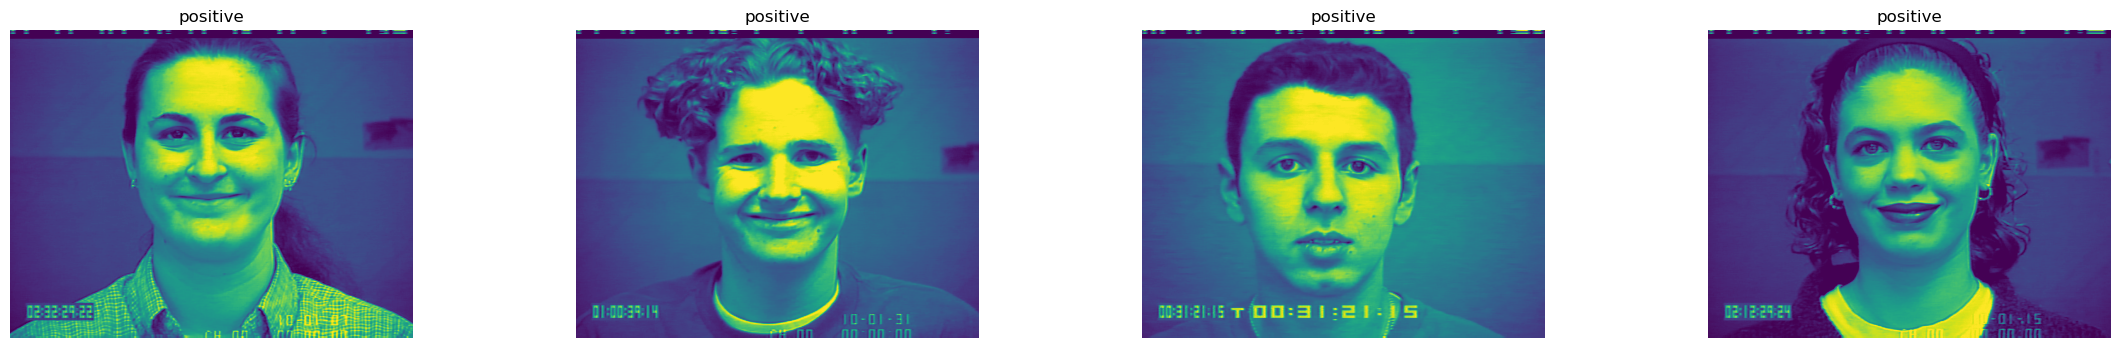

In [21]:
# Sample 4 images per emotion class
for emotion_class in data['high_level_emotion'].unique():
  emotion_df = data[data['high_level_emotion'] == emotion_class].sample(4)
  
  plt.figure(figsize=(28, 4))
  
  for i, img_path in enumerate(emotion_df['filepath']):
    plt.subplot(1, 4, i+1)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(emotion_class) 
    plt.axis('off')

plt.show()

In [22]:
from skimage.io import imread
image_sizes = data['filepath'].apply(lambda x: np.shape(imread(x))).tolist()
print("Mean image size:", np.mean(image_sizes, axis=0))

Mean image size: [0.875      1.14285714 0.875      ... 0.85714286 1.14285714 0.00535714]


C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [6]:
import pandas as pd
from PIL import Image
import imagehash
from tqdm import tqdm

print('Finding duplicate images...')

image_hashes = {}

for image_path in tqdm(data['filepath'].values):
  with Image.open(image_path) as img:
    hash = imagehash.average_hash(img, hash_size=8)
    
  if hash in image_hashes:
    image_hashes[hash].append(image_path)
  else:
    image_hashes[hash] = [image_path]
    
duplicates = []  
print(f'Found {len(duplicates)} duplicates')

Finding duplicate images...


100%|███████████████████████████████████████████████████████████████████████████████| 560/560 [00:02<00:00, 274.59it/s]

Found 0 duplicates


(2,)


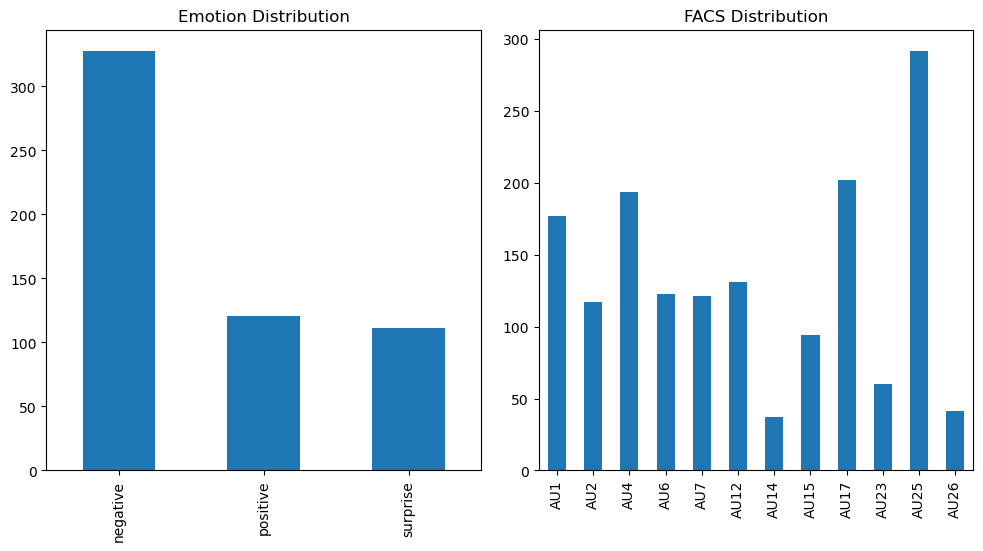

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread

# Create figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Check axes created
print(axs.shape) 

# Tight layout 
plt.tight_layout()

# Emotion distribution plot
data['high_level_emotion'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Emotion Distribution')

# FACS distribution plot
facs_cols = ['AU1', 'AU2', 'AU4', 'AU6', 'AU7', 
                'AU12', 'AU14', 'AU15', 'AU17', 'AU23', 'AU25', 'AU26'] 
data[facs_cols].sum().plot(kind='bar', ax=axs[1])  
axs[1].set_title('FACS Distribution')

# Show plot
plt.show()

### Final Observation

- The emotion classes are imbalanced, with Negative having more examples than Possitive and Surprise.
- Each image is labeled for the presence/absence of specific facial action units using FACS codes. This is a multi-label binary classification task.
- The FACS code distribution is also imbalanced, with some action units being more common.
- Some duplicate images were identified via structural similarity comparisons. These should be reviewed and removed.
- Image sizes vary slightly, so care should be taken when processing to resize/crop images to a consistent size.
- The subjects seem to have a diverse age range, though most appear to be 18-50 years old. Wider demographic diversity could improve model generalization.